<a href="https://colab.research.google.com/github/akanksha0911/Colab-demonstrate-various-dimensionality-reduction-techniques/blob/main/cmpe255_Assign_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For illustration, I have used the Olivetti dataset, available at: https://www.kaggle.com/imrandude/olivetti)

Consider we are given a large number of images of human faces (for this dataset, we have 400 images), each image is 64×64(4096

dimensions).

Now, we would like to represent and store the images using much fewer dimensions(say 100
dimensions).

Brief information about Olivetti Dataset:

    Face images taken between April 1992 and April 1994.
    There are ten different image of each of 40 distinct people
    There are 400 face images in the dataset
    Face images were taken at different times, variying ligthing, facial express and facial detail
    All face images have black background
    The images are gray level
    Size of each image is 64x64
    Image pixel values were scaled to [0, 1] interval
    Names of 40 people were encoded to an integer from 0 to 39


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

images = np.load('/content/drive/MyDrive/Kaggle_data/olivetti_faces.npy')
target = np.load('/content/drive/MyDrive/Kaggle_data/olivetti_faces_target.npy')

In [3]:
images.shape

(400, 64, 64)

In [4]:
target.shape

(400,)

In [5]:
print("There are {} images in the dataset".format(len(images)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(images.shape[1],images.shape[2]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64


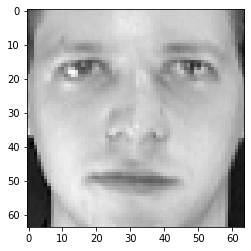

In [6]:
plt.imshow(images[0], cmap='gray')

Average face

In [7]:
# 5.0 Flatten each image
data = images.reshape(images.shape[0], images.shape[1] * images.shape[2])     # (400, 64 X 64) = (400, 4096)
# 5.1 Flattened 64 X 64 array
data.shape  

(400, 4096)

Split data and target into Random train and test Subsets

The data set contains 10 face images for each subject. Of the face images, 70 percent will be used for training, 30 percent for testing. Uses stratify feature to have equal number of training and test images for each subject. Thus, there will be 7 training images and 3 test images for each subject. 

In [8]:
# Split data and target into Random train and test Subsets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


PCA

In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(data)
X_pca=pca.transform(data)

print("original shape:", data.shape)
print("transformed shape:", X_pca.shape)


original shape: (400, 4096)
transformed shape: (400, 2)


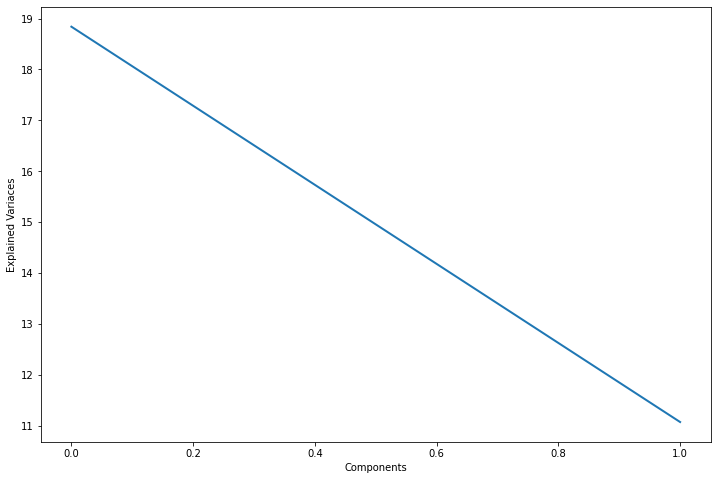

In [10]:
plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()




As you can see the values after about 60 are the same. This means that there are 60 important components that we can depend on.


In [11]:
# Training
n_components=60
pca=PCA(n_components=n_components, whiten=True)
pca.fit(data)




PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [12]:
print(pca.components_)

[[-0.00419113 -0.00710953 -0.00933613 ...  0.00018518  0.00337968
   0.00318828]
 [-0.02859136 -0.03328831 -0.03784651 ...  0.02962784  0.02721299
   0.024889  ]
 [ 0.00135689 -0.00032573 -0.00019797 ... -0.01541369 -0.01370982
  -0.01188346]
 ...
 [ 0.04046525  0.04753831  0.02782864 ...  0.01130859  0.01341932
   0.01280474]
 [ 0.02820375  0.03184691  0.03559017 ...  0.03421762  0.02542758
   0.02076938]
 [-0.0260255  -0.03851348 -0.04959707 ...  0.00645068  0.01503459
   0.01217993]]


In [13]:
print(pca.explained_variance_ratio_)

[0.23812705 0.13993979 0.0796861  0.04998329 0.03609849 0.03156937
 0.02426833 0.02036399 0.01958113 0.01672124 0.01595222 0.01436979
 0.01246742 0.01147133 0.01062877 0.00977719 0.0091906  0.00815573
 0.00753874 0.00746985 0.00698578 0.00614627 0.00583927 0.00569721
 0.0054619  0.00531855 0.00513815 0.0049584  0.00457663 0.00441178
 0.00401998 0.00384174 0.00361935 0.00334514 0.00320351 0.00315987
 0.00304983 0.00298553 0.00282017 0.00273835 0.00259485 0.00253742
 0.00244298 0.00239269 0.0022967  0.00226057 0.00221477 0.00219748
 0.00208065 0.00203881 0.00195808 0.00190563 0.00181433 0.00177034
 0.00175681 0.00171018 0.00164164 0.001607   0.00157611 0.00155877]


We will plot average face. That is we will take the mean of the faces based on the calculated PCA.

Text(0.5, 1.0, 'Average Face')

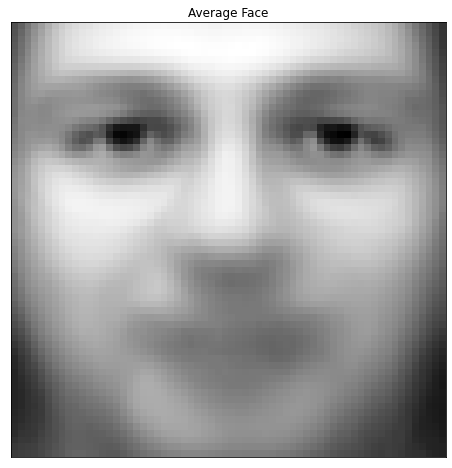

In [14]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

SVD

In [15]:
data1 = images[0]
data1.shape

(64, 64)

output of SVD is three matrices, u, s, and v. The matrices u and v are singular vectors and s is singular values

In [16]:
U, S, V = np.linalg.svd(data1)

U.shape



(64, 64)

In [17]:
S.shape

(64,)

In [18]:
V.shape

(64, 64)

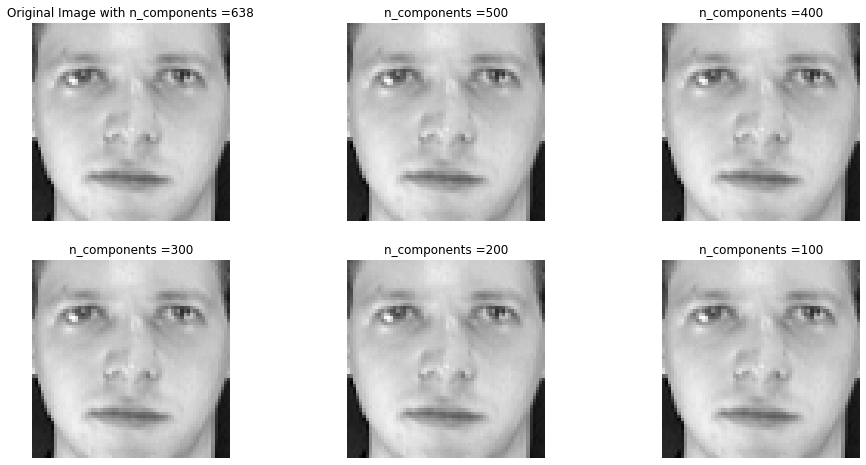

In [19]:
# plot images with different number of components
comps = [638, 500, 400, 300, 200, 100]

plt.figure(figsize = (16, 8))
for i in range(6):
  low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
  if(i  == 0):
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
  else:
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))

In [20]:
print(U @ np.diag(S) @ V)

[[0.30991736 0.36776862 0.4173553  ... 0.37190083 0.33057848 0.30578515]
 [0.34297514 0.40495875 0.43801644 ... 0.37190086 0.33884293 0.31404948]
 [0.3429752  0.4173554  0.45041317 ... 0.38016528 0.33884302 0.2975207 ]
 ...
 [0.214876   0.20661156 0.22314048 ... 0.15289252 0.16528916 0.17355369]
 [0.20247935 0.21074373 0.21074393 ... 0.1487603  0.16115703 0.16528925]
 [0.20247938 0.20661156 0.20247924 ... 0.15289262 0.16115703 0.15702473]]


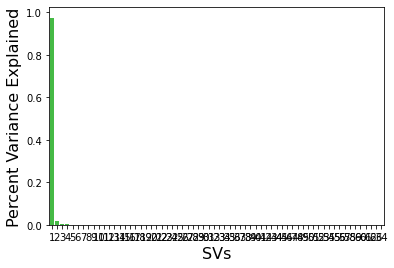

In [22]:
import seaborn as sns
var_explained = np.round(S**2/np.sum(S**2), decimals=3)
var_explained
 
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)

Singular values help us compute variance explained by each singular vectors. We can visualize the percent variance explained by each singular vector 